# 19BCE1321
# KUNAL JAISWAL
# MACHINE LEARNING
# DA-1

# YOUTUBE LINK 
<a>https://youtu.be/zwrDlFeyNSk</a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, r2_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [3]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import roc_auc_score, roc_curve, recall_score

In [96]:
from sklearn.metrics import precision_score, precision_recall_curve, classification_report
from sklearn.metrics import ConfusionMatrixDisplay

In [4]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.isnull().mean()

Pregnancies                 0.0
Glucose                     0.0
BloodPressure               0.0
SkinThickness               0.0
Insulin                     0.0
BMI                         0.0
DiabetesPedigreeFunction    0.0
Age                         0.0
Outcome                     0.0
dtype: float64

In [5]:
#dib['Diabetes'] = dib['Diabetes'].map({'Yes': 1, 'No': 0})    
# Converting Yes to 1 and No to 0
df['Outcome'] = df['Outcome'].map({1:'Yes', 0:'No'})

<AxesSubplot:>

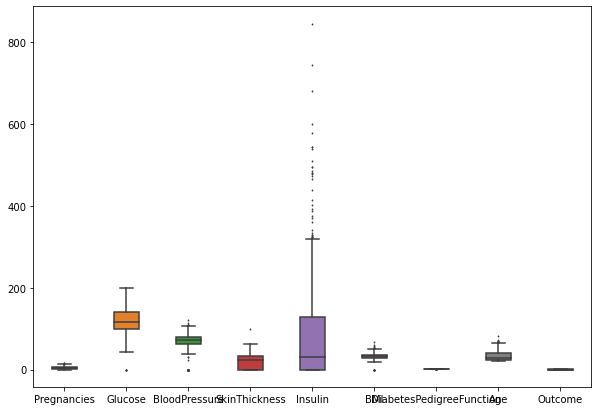

In [8]:
fig,ax = plt.subplots(figsize=(10,7))

sns.boxplot(data=df,ax=ax, width=0.4, fliersize=1)

In [13]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,30.5,33.6,0.627,50,Yes
1,1,85,66,29,30.5,26.6,0.351,31,No
2,8,183,64,23,30.5,23.3,0.672,32,Yes
3,1,89,66,23,94.0,28.1,0.167,21,No
4,0,137,40,35,168.0,43.1,2.288,33,Yes


In [6]:
df['Outcome'] = df['Outcome'].map({'Yes':1, 'No':0})

In [7]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [9]:
#replace in each feature with zero(0) value with median of data

#checking which feature has how many zeros
for col in df.columns:
    print(col,' : ',df[df[col]==0][col].count())
    

    

Pregnancies  :  111
Glucose  :  5
BloodPressure  :  35
SkinThickness  :  227
Insulin  :  374
BMI  :  11
DiabetesPedigreeFunction  :  0
Age  :  0
Outcome  :  500


In [10]:
#now replacing the zero values except for pregnancies 

df['Glucose'] = df['Glucose'].replace(0, df['Glucose'].median())
df['BloodPressure'] = df['BloodPressure'].replace(0, df['BloodPressure'].median())
df['SkinThickness'] = df['SkinThickness'].replace(0, df['SkinThickness'].median())
df['Insulin'] = df['Insulin'].replace(0, df['Insulin'].median())
df['BMI'] = df['BMI'].replace(0, df['BMI'].median())


In [11]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [12]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,30.5,33.6,0.627,50,1
1,1,85,66,29,30.5,26.6,0.351,31,0
2,8,183,64,23,30.5,23.3,0.672,32,1
3,1,89,66,23,94.0,28.1,0.167,21,0
4,0,137,40,35,168.0,43.1,2.288,33,1


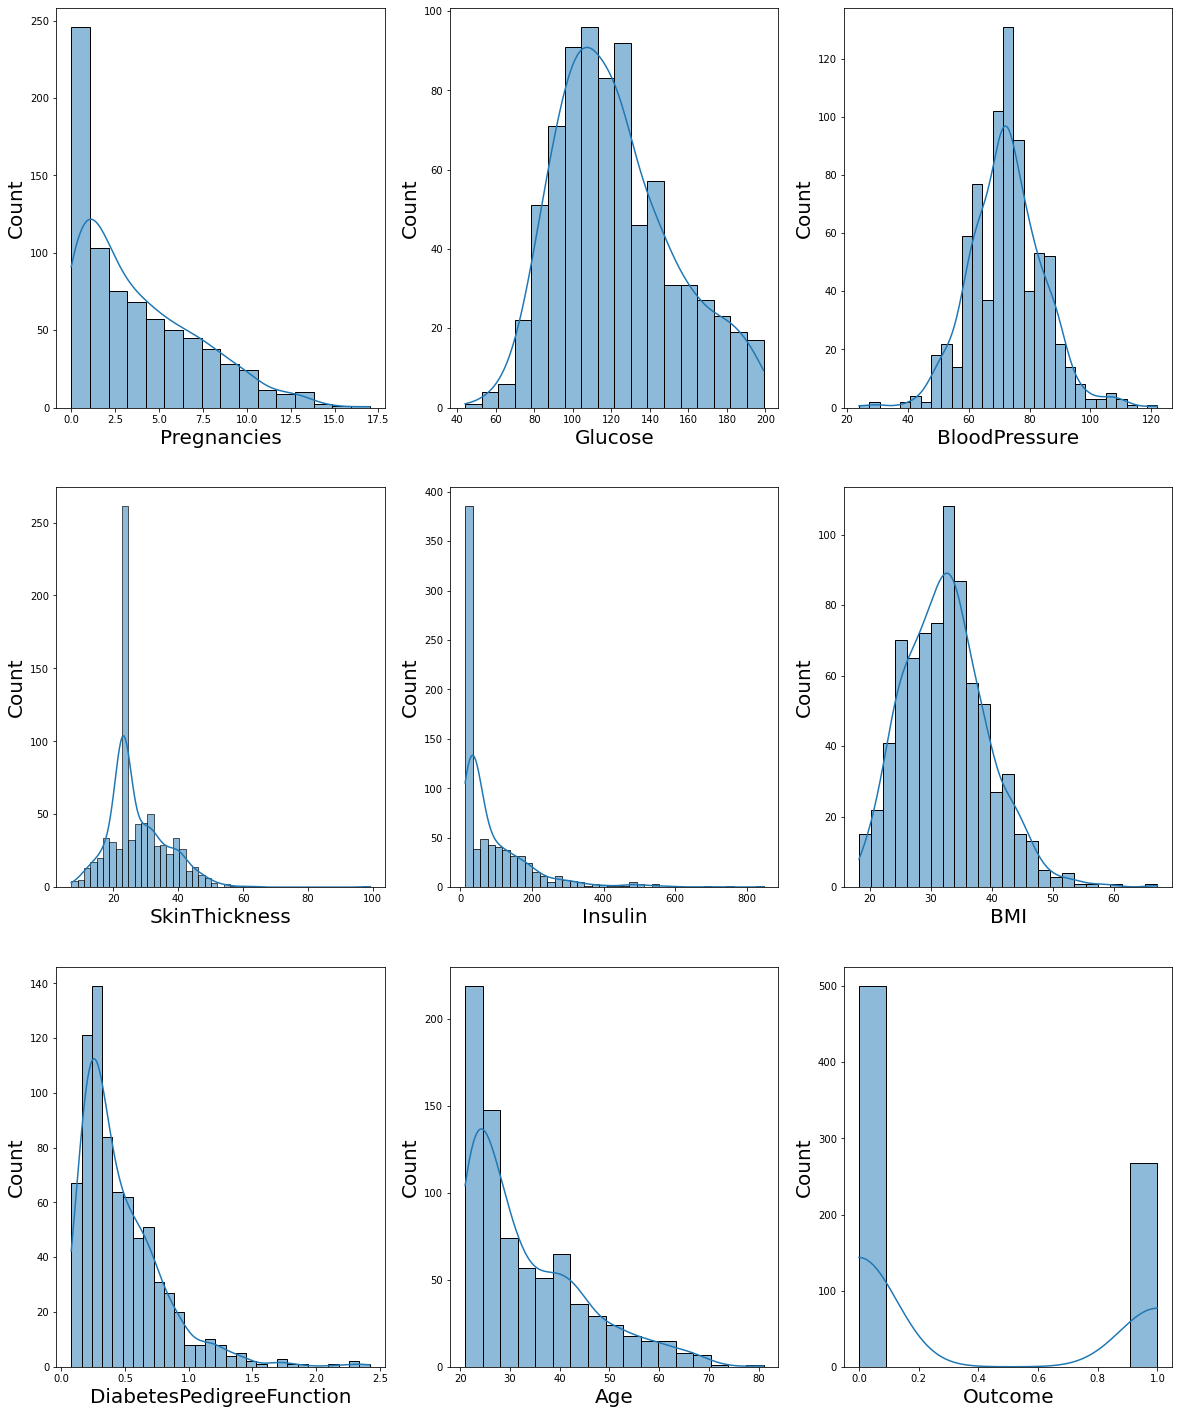

In [13]:
plt.figure(figsize=(20,25), facecolor='white')
plot_no = 1
#since distplot is deprecated which had ax but 
#displot is FacetGrid
for col in df.columns:
    if plot_no<=9:
        plt.subplot(3,3,plot_no)
        sns.histplot(data=df, x=col, kde=True)
        plt.xlabel(col, fontsize=20)
        plt.ylabel('Count',fontsize=20)
    plot_no = plot_no + 1
plt.show()

# 
<ul><li>From the documentation for seaborn.distplot, which has been DEPRECATED in seaborn 0.11.</li>
    <li>.distplot is replaced with the following:</li>
<ul><li>displot(), a figure-level function with a similar flexibility over the kind of plot to draw. This is a FacetGrid, and does not have the ax parameter.</li>
<li>histplot(), an axes-level function for plotting histograms, including with kernel density smoothing. This does have the ax parameter.</li></ul>
<li>It is applicable to any of the seaborn FacetGrid plots that there is no ax parameter. Use the equivalent axes-level plot.</li></ul>

In [14]:
#since the data is normalised and a bit skewed

<AxesSubplot:>

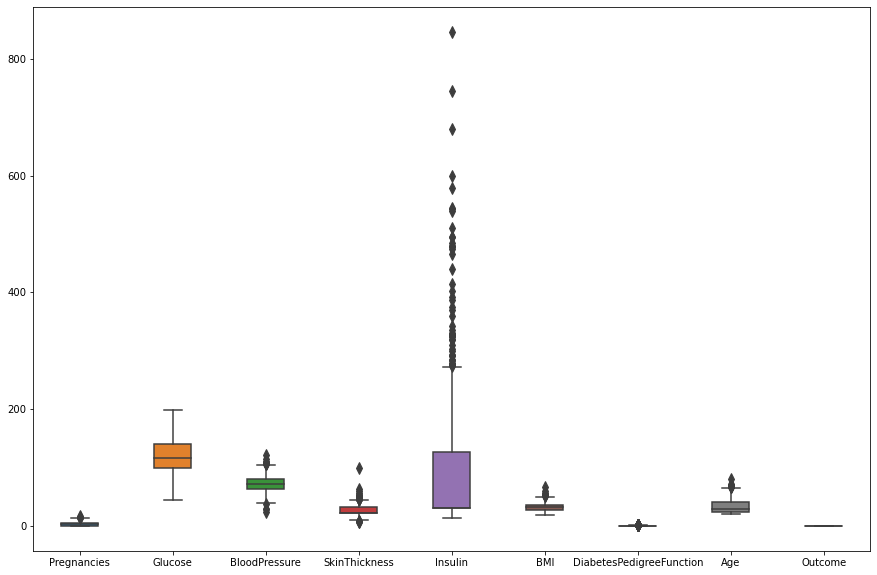

In [15]:
fig,ax = plt.subplots(figsize=(15,10))

sns.boxplot(data=df, width=0.4, ax=ax, fliersize=8)

In [16]:
q = df['Pregnancies'].quantile(0.98)
#we are removing top 2% data from pregnancies column
df_cleaned = df[df['Pregnancies']<q]

q = df_cleaned['BloodPressure'].quantile(0.99)
# we are removing top 1% data from blood pressure column
df_cleaned = df_cleaned[df_cleaned['BloodPressure']<q]

q = df_cleaned['SkinThickness'].quantile(0.99)
# we are removing top 1% data from blood pressure column
df_cleaned = df_cleaned[df_cleaned['SkinThickness']<q]

q = df_cleaned['Insulin'].quantile(0.95)
# we are removing top 5% data from blood pressure column
df_cleaned = df_cleaned[df_cleaned['Insulin']<q]

q = df_cleaned['BMI'].quantile(0.99)
# we are removing top 1% data from blood pressure column
df_cleaned = df_cleaned[df_cleaned['BMI']<q]

q = df_cleaned['DiabetesPedigreeFunction'].quantile(0.99)
# we are removing top 1% data from blood pressure column
df_cleaned = df_cleaned[df_cleaned['DiabetesPedigreeFunction']<q]

q = df_cleaned['Age'].quantile(0.99)
# we are removing top 1% data from blood pressure column
df_cleaned = df_cleaned[df_cleaned['Age']<q]

<AxesSubplot:>

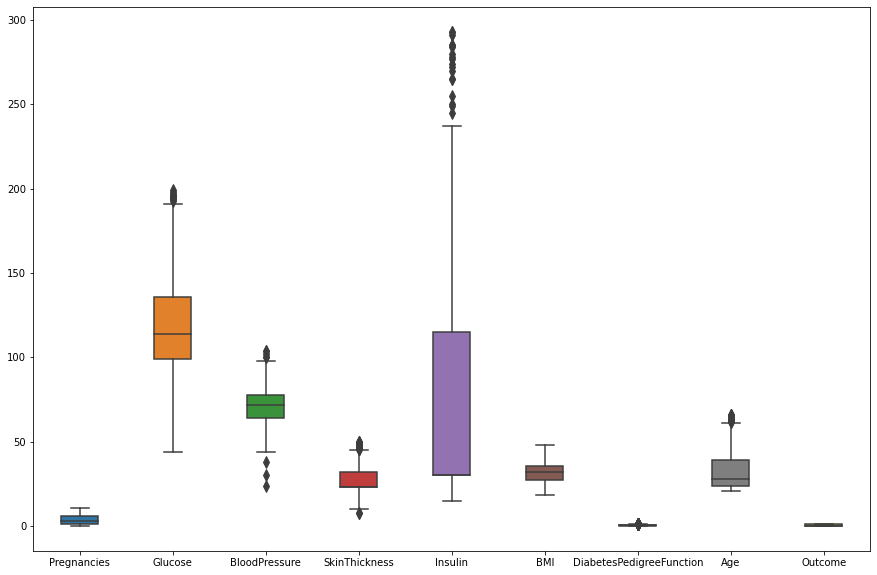

In [17]:
fig,ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=df_cleaned, width=0.4, fliersize=8)

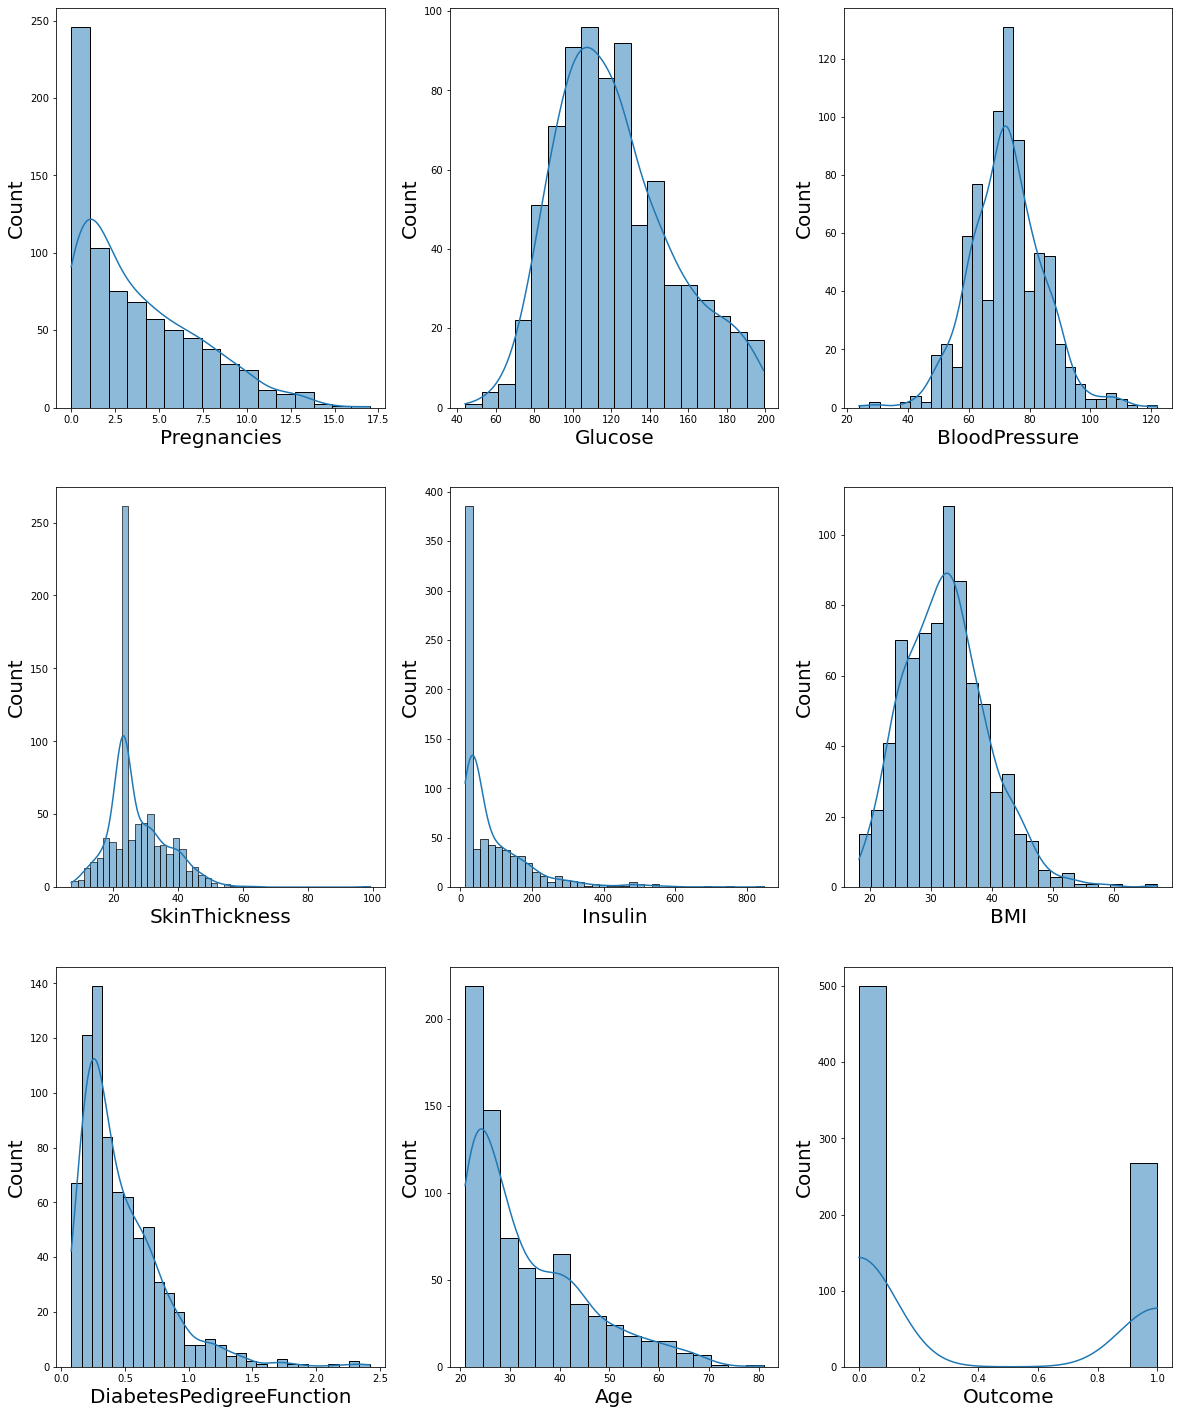

In [18]:
plt.figure(figsize=(20,25), facecolor='white')
plot_no = 1
#since distplot is deprecated which had ax but 
#displot is FacetGrid
for col in df.columns:
    if plot_no<=9:
        plt.subplot(3,3,plot_no)
        sns.histplot(data=df, x=col, kde=True)
        plt.xlabel(col, fontsize=20)
        plt.ylabel('Count',fontsize=20)
    plot_no = plot_no + 1
plt.show()

In [19]:
X = df_cleaned.drop(labels=['Outcome'], axis=1)
y = df_cleaned['Outcome']

In [20]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,30.5,33.6,0.627,50
1,1,85,66,29,30.5,26.6,0.351,31
2,8,183,64,23,30.5,23.3,0.672,32
3,1,89,66,23,94.0,28.1,0.167,21
5,5,116,74,23,30.5,25.6,0.201,30
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180.0,32.9,0.171,63
764,2,122,70,27,30.5,36.8,0.340,27
765,5,121,72,23,112.0,26.2,0.245,30
766,1,126,60,23,30.5,30.1,0.349,47


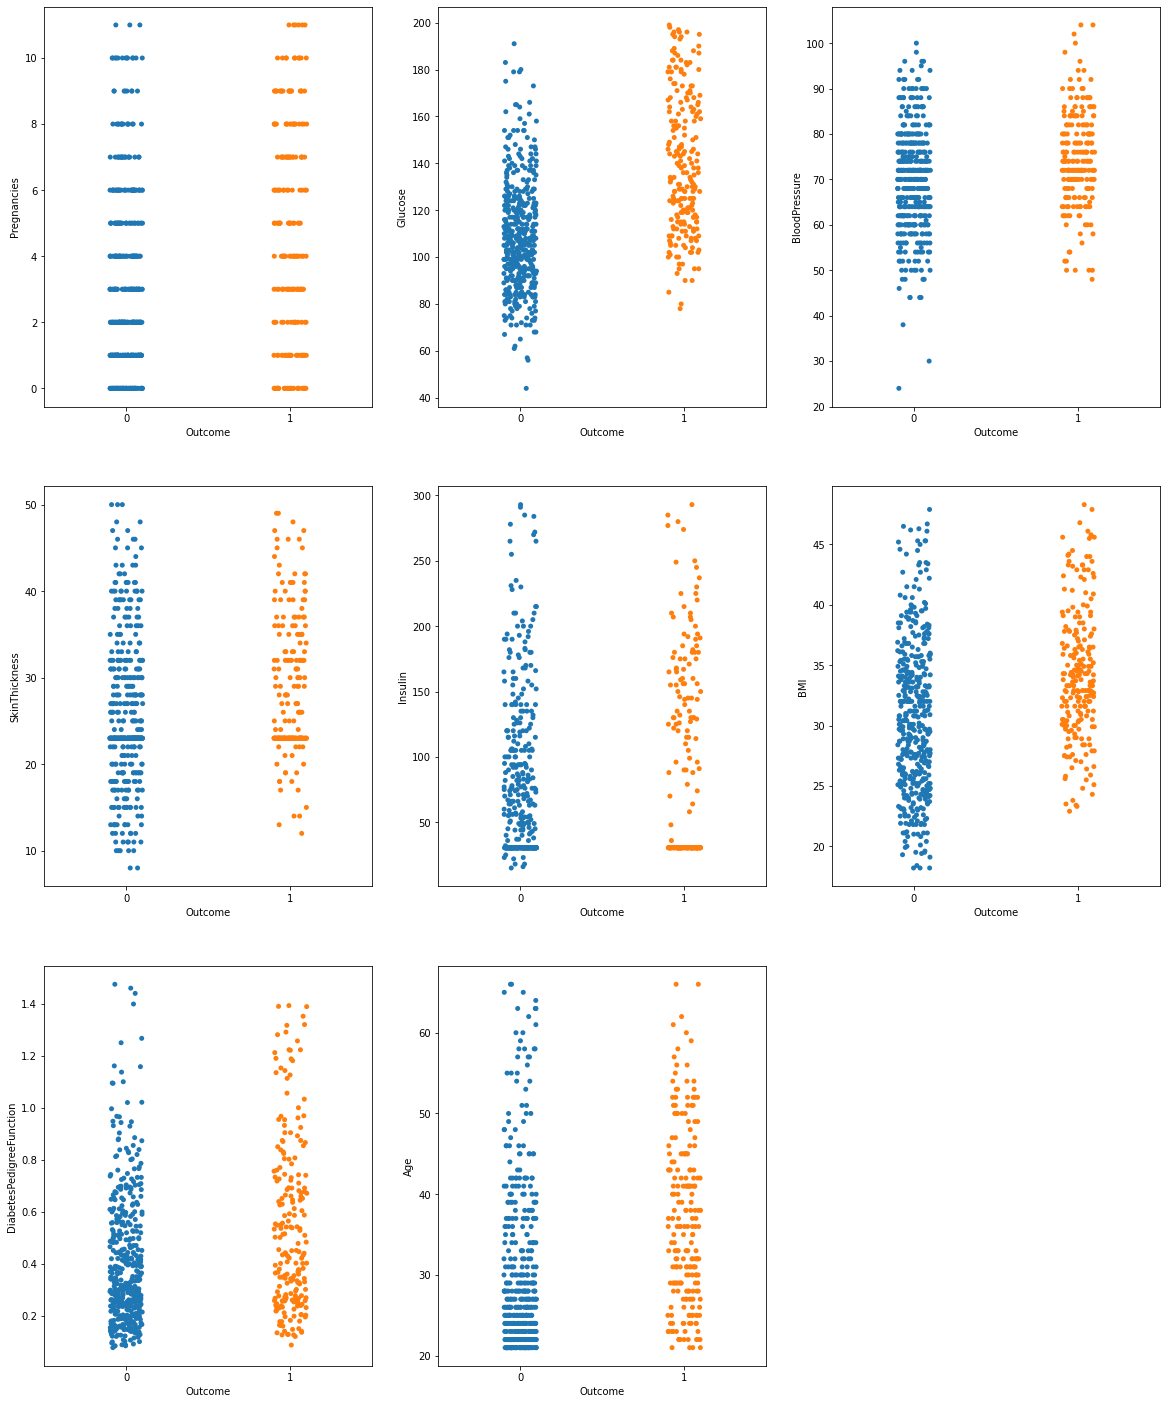

In [21]:
#lets see how data is distributed for every column
# whether data is imbalanceed or not
# we can also see that data is fluctuating in different range
plt.figure(figsize=(20,25), facecolor='white')
plot_no = 1

for col in X.columns:
    if plot_no<10:
        ax = plt.subplot(3,3,plot_no)
        sns.stripplot(data=df_cleaned, y=col, x='Outcome')
    plot_no+=1
plt.show()

In [22]:
scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)

In [23]:
vif = pd.DataFrame()
vif['VifFactors'] = [variance_inflation_factor(X_scaled,i) for i in range(X.shape[1])]
vif['Features'] = X.columns
vif

,VifFactors,Features
0,1.448038,Pregnancies
1,1.261908,Glucose
2,1.243961,BloodPressure
3,1.501699,SkinThickness
4,1.250778,Insulin
5,1.533774,BMI
6,1.056578,DiabetesPedigreeFunction
7,1.648083,Age


<p>All VIF less than 5 so there is no multicollinearity</p>

In [24]:
x_train, x_test, y_train, y_test = train_test_split(X_scaled, y, random_state=44, test_size=0.3)

In [25]:
logit = LogisticRegression()
logit.fit(x_train, y_train)

LogisticRegression()

### y_score is probility of the true(1) column in predict_proba in LogisticRegression

In [78]:
y_pred = logit.predict(x_test)
y_score = logit.predict_proba(x_test)[:,1]
y_score.ravel()

array([0.46240897, 0.96797782, 0.41737476, 0.17180235, 0.308766  ,
       0.0555534 , 0.01120482, 0.18215452, 0.50264747, 0.171933  ,
       0.24006826, 0.44325367, 0.05606767, 0.9147722 , 0.39310536,
       0.02230222, 0.78380146, 0.18981219, 0.24259974, 0.03127294,
       0.03404572, 0.12684211, 0.19914833, 0.03213258, 0.1994219 ,
       0.05234806, 0.08841727, 0.24556942, 0.05058181, 0.26200292,
       0.01224287, 0.21095921, 0.84617352, 0.15746286, 0.01575556,
       0.91389894, 0.06338786, 0.83068897, 0.13048595, 0.20235163,
       0.24409327, 0.99617141, 0.03637511, 0.08136559, 0.15043819,
       0.51042128, 0.02913158, 0.18868395, 0.49757483, 0.05202534,
       0.17962733, 0.219378  , 0.05162026, 0.83658409, 0.79726148,
       0.32572299, 0.05037938, 0.38735481, 0.07053356, 0.23358334,
       0.78530564, 0.10051375, 0.0960761 , 0.16188622, 0.08082192,
       0.4885652 , 0.2553733 , 0.11684561, 0.93971565, 0.25571169,
       0.92246096, 0.07414806, 0.26431041, 0.65637726, 0.58276

In [27]:
accuracy_score(y_test, y_pred)

0.7711442786069652

### Confusion Matrix

In [28]:
# Confusion Matrix
conf_mat = confusion_matrix(y_test, y_pred)

In [29]:
conf_mat

array([[127,  12],
       [ 34,  28]])

In [49]:
tn = conf_mat[0][0]
tp = conf_mat[1][1]
fp = conf_mat[0][1]
fn = conf_mat[1][0]

In [50]:
Accuracy = (tp+tn)/np.sum(conf_mat)
Accuracy

0.7711442786069652

In [51]:
Precision = tp/(tp+fp)
Precision

0.7

### Sensitivity (Recall or True Positive Rate)

In [52]:
Recall = tp/(tp+fn)
Recall


0.45161290322580644

In [58]:
recall_score(y_test, y_pred)

0.45161290322580644

In [53]:
f1_score = 2*Precision*Recall/(Recall+Precision)
f1_score

0.5490196078431372

### SPECIFICITY(True Negative Rate)

In [56]:
specificity = tn/(tn+fp)
specificity

0.9136690647482014

### (1-specificity) (False Positive Rate)

In [57]:
fpr = fp/(tn+fp)
fpr

0.08633093525179857

In [54]:
# Area under Curve

auc = roc_auc_score(y_test, y_pred)
auc

0.6826409839870039

In [98]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.91      0.85       139
           1       0.70      0.45      0.55        62

    accuracy                           0.77       201
   macro avg       0.74      0.68      0.70       201
weighted avg       0.76      0.77      0.75       201



## ROC(Receiver Operator Characteristics)

In [79]:
fpr, tpr, thresholds = roc_curve(y_test, y_score)

Text(0.5, 1.0, 'Receiver Operating Curve ROC')

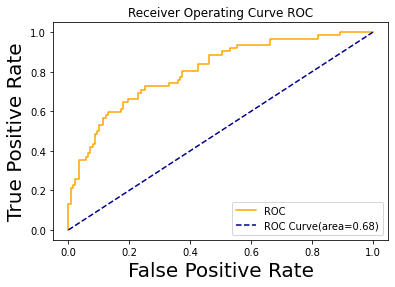

In [80]:
plt.plot(fpr,tpr, color='orange', label='ROC')
plt.plot([0,1], [0,1], color='darkblue', linestyle='dashed', label='ROC Curve(area=0.68)',markersize=2)
plt.xlabel('False Positive Rate', fontsize=20)
plt.ylabel('True Positive Rate', fontsize=20)
plt.legend()
plt.title('Receiver Operating Curve ROC')

In [81]:
thresholds


array([1.99617141, 0.99617141, 0.92246096, 0.9147722 , 0.83658409,
       0.83068897, 0.81229742, 0.81056862, 0.79042474, 0.78587202,
       0.65637726, 0.58729002, 0.58276446, 0.56962136, 0.56798703,
       0.55250259, 0.54735383, 0.53458079, 0.51042128, 0.50857366,
       0.4885652 , 0.48570389, 0.48331664, 0.46240897, 0.44670851,
       0.42989641, 0.41957378, 0.41737476, 0.39958852, 0.39901259,
       0.39692733, 0.36526693, 0.35478371, 0.33560769, 0.32750251,
       0.31646872, 0.308766  , 0.26843651, 0.26200292, 0.25880922,
       0.25571169, 0.25170838, 0.24556942, 0.2217554 , 0.219378  ,
       0.20235163, 0.1994219 , 0.19914833, 0.19409847, 0.19131564,
       0.18868395, 0.171933  , 0.16878314, 0.15746286, 0.15222149,
       0.13885292, 0.13883817, 0.12517896, 0.12232615, 0.11890242,
       0.11684561, 0.07054587, 0.06950179, 0.04146728, 0.04068794,
       0.03213258, 0.03127294, 0.00683489])

In [82]:
print(fpr)

[0.         0.         0.         0.00719424 0.00719424 0.01438849
 0.01438849 0.02158273 0.02158273 0.03597122 0.03597122 0.05755396
 0.05755396 0.0647482  0.0647482  0.07194245 0.07194245 0.07913669
 0.07913669 0.08633094 0.08633094 0.09352518 0.09352518 0.10071942
 0.10071942 0.11510791 0.11510791 0.12230216 0.12230216 0.1294964
 0.1294964  0.17266187 0.17266187 0.17985612 0.17985612 0.1942446
 0.1942446  0.23021583 0.23021583 0.23741007 0.23741007 0.25179856
 0.25179856 0.33093525 0.33093525 0.35971223 0.35971223 0.36690647
 0.36690647 0.37410072 0.37410072 0.42446043 0.42446043 0.46043165
 0.46043165 0.50359712 0.50359712 0.5323741  0.5323741  0.55395683
 0.55395683 0.6618705  0.6618705  0.82014388 0.82014388 0.89208633
 0.89208633 1.        ]


In [83]:
tpr - fpr

array([0.        , 0.01612903, 0.12903226, 0.12183801, 0.20248317,
       0.19528893, 0.21141796, 0.20422372, 0.23648178, 0.22209329,
       0.31886749, 0.29728475, 0.31341379, 0.30621954, 0.32234857,
       0.31515433, 0.34741239, 0.34021815, 0.35634718, 0.34915294,
       0.39754003, 0.39034579, 0.40647482, 0.39928058, 0.43153864,
       0.41715015, 0.44940822, 0.44221397, 0.458343  , 0.45114876,
       0.46727779, 0.42411232, 0.44024136, 0.43304711, 0.46530518,
       0.45091669, 0.46704572, 0.4310745 , 0.46333256, 0.45613832,
       0.47226735, 0.45787886, 0.47400789, 0.3948712 , 0.41100023,
       0.38222325, 0.39835229, 0.39115804, 0.40728707, 0.40009283,
       0.43235089, 0.38199118, 0.41424925, 0.37827802, 0.42666512,
       0.38349965, 0.39962868, 0.37085171, 0.38698074, 0.365398  ,
       0.38152704, 0.27361337, 0.30587143, 0.14759805, 0.16372708,
       0.09178464, 0.10791367, 0.        ])

## Optimal Threshold argmax(tpr - fpr)

In [71]:
tpr - fpr

array([0.        , 0.36528197, 0.        ])

In [84]:
optimal_index = np.argmax(tpr - fpr)
optimal_index

42

In [85]:
optimal_threshold = thresholds[optimal_index]
optimal_threshold

0.2455694216943559

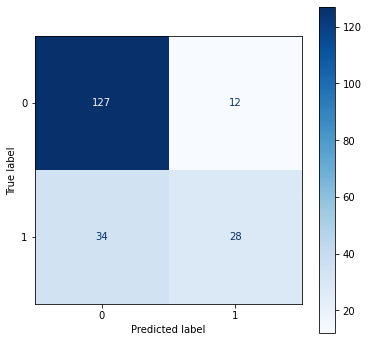

In [55]:
conf_mat_disp = ConfusionMatrixDisplay(conf_mat)
fig, ax = plt.subplots(figsize=(6,6))
conf_mat_disp.plot(ax=ax, cmap=plt.cm.Blues)

In [43]:
conf_mat_disp

## predicting the y_predict for optmial threshold

In [86]:
y_pred_optimal_threshold = np.where(y_score>=optimal_threshold, 1, 0)


In [87]:
recall_score(y_test, y_pred_optimal_threshold)

0.7258064516129032

In [89]:
precision_score(y_test,y_pred_optimal_threshold)

0.5625

## Confusion Matrix After Choosing OPtmial Threshold

In [94]:
conf_mat_after = confusion_matrix(y_test, y_pred_optimal_threshold)
conf_mat_after

array([[104,  35],
       [ 17,  45]])

In [91]:
recall_score(y_test, y_pred_optimal_threshold)

0.7258064516129032

In [93]:
auc_before = roc_auc_score(y_test, y_pred)
auc_after = roc_auc_score(y_test, y_pred_optimal_threshold)
print('AUC Before tweaking Threshold: ',auc_before)
print('\nAUC After twaeking the Threshold: ', auc_after)
## It's clear that AUC increased so we select after tweaking threshold

AUC Before tweaking Threshold:  0.6826409839870039

AUC After twaeking the Threshold:  0.7370039452309121


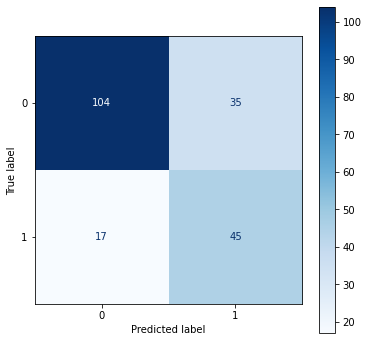

In [95]:
conf_mat_disp_after = ConfusionMatrixDisplay(conf_mat_after)
fig, ax = plt.subplots(figsize=(6,6))
conf_mat_disp_after.plot(ax=ax, cmap=plt.cm.Blues)

## AUC Before And After (Sensitivity vs 1-specificity) (tpr vs fpr)

In [100]:
tn_after = conf_mat_after[0][0]
tp_after = conf_mat_after[1][1]
fp_after = conf_mat_after[0][1]
fn_after = conf_mat_after[1][0]

In [99]:
print(classification_report(y_test, y_pred_optimal_threshold))

              precision    recall  f1-score   support

           0       0.86      0.75      0.80       139
           1       0.56      0.73      0.63        62

    accuracy                           0.74       201
   macro avg       0.71      0.74      0.72       201
weighted avg       0.77      0.74      0.75       201



### (1- Specificity)  FPR After

In [103]:
specificity_after = tn_after/(tn_after+fp_after)
fpr_after = 1 - specificity_after
fpr_after

0.2517985611510791

## Sensitivity After Recall TPR

In [104]:
tpr_after = recall_score(y_test, y_pred_optimal_threshold)
tpr_after

0.7258064516129032